In [1]:
import h5py
import numpy as np
import datetime
import matplotlib.pyplot as p
import matplotlib.gridspec as gridspec
from matplotlib import dates
from astropy.time import Time
%matplotlib inline

## Import solar wind data
Reading the data from the HDF file is simple using the HDF5 python routines.  The python object allows the data arrays to be accessed as elements of the dictionary structure returned by the call.  First we will convert the time data set from seconds into hours.  

In [2]:
f = h5py.File('bcwind.h5','r')

In [3]:
hours = f['T'][:]/3600.0

We will also create a python datetime object from the Modfied Julian Date using the Time functions of astropy which is a prereq of kaipy

In [4]:
astroT = Time(f['MJD'][:],format='mjd').iso

In [5]:
utall = []
for ut in astroT:
    utall.append(datetime.datetime.strptime(ut,'%Y-%m-%d %H:%M:%S.%f'))

## Make the plot

Now we make a simple plot of the solar wind data.  We could use either the hours array or the utall array as the x-axis.  Since we want to demostrate how to deal with datetime objects in plots we will use the later.

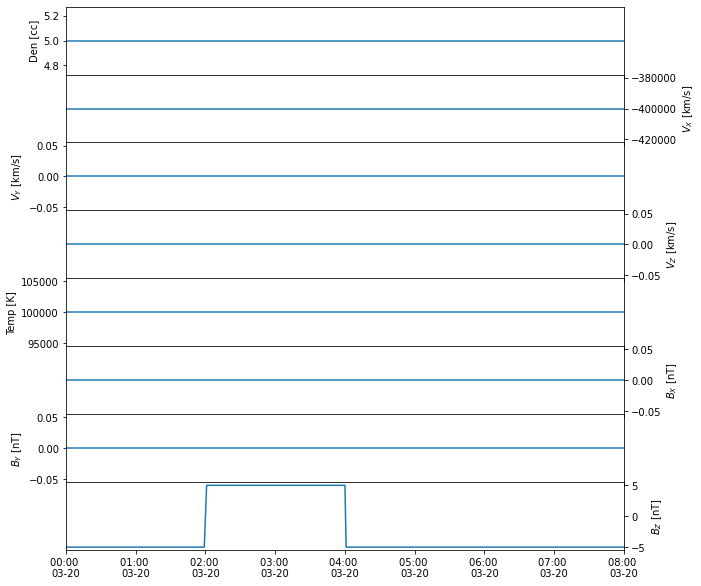

In [6]:
nrows = 8
ncols = 1
utfmt='%H:%M \n%m-%d'
fig,ax=p.subplots(nrows=nrows,ncols=ncols,sharex=True,figsize=(10,10))
ax[0].plot(utall,f['D'][:])
ax[0].set_ylabel('Den [cc]')
ax[1].plot(utall,f['Vx'][:])
ax[1].set_ylabel('$V_X$ [km/s]')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[2].plot(utall,f['Vy'][:])
ax[2].set_ylabel('$V_Y$ [km/s]')
ax[3].plot(utall,f['Vz'][:])
ax[3].set_ylabel('$V_Z$ [km/s]')
ax[3].yaxis.tick_right()
ax[3].yaxis.set_label_position('right')
ax[4].plot(utall,f['Temp'][:])
ax[4].set_ylabel('Temp [K]')
ax[5].plot(utall,f['Bx'][:])
ax[5].set_ylabel('$B_X$ [nT]')
ax[5].yaxis.tick_right()
ax[5].yaxis.set_label_position('right')
ax[6].plot(utall,f['By'][:])
ax[6].set_ylabel('$B_Y$ [nT]')
ax[7].plot(utall,f['Bz'][:])
ax[7].set_ylabel('$B_Z$ [nT]')
ax[7].yaxis.tick_right()
ax[7].yaxis.set_label_position('right')
ax[0].set_xlim(utall[0],utall[-1])
ax[0].xaxis_date()
xfmt = dates.DateFormatter(utfmt)
ax[0].xaxis.set_major_formatter(xfmt)
fig.subplots_adjust(hspace=0)
p.savefig('Kaiju-PlotSW.pdf',format="pdf",bbox_inches='tight',pad_inches=0.0)